<a href="https://colab.research.google.com/github/Vaibhavi1707/PicRead/blob/master/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model, load_model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt

In [ ]:
model = load_model("/content/model.h5")

In [ ]:
word_2_indices = pickle.load(open('/content/gdrive/My Drive/Colab Notebooks/word_2_indices.pkl', 'rb'))
indices_2_word = pickle.load(open('/content/gdrive/My Drive/Colab Notebooks/indices_2_word.pkl', 'rb'))

In [ ]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [ ]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [ ]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [ ]:
img = "/content/gdrive/My Drive/Colab Notebooks/Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/1453366750_6e8cf601bf.jpg"

test_img = get_encoding(resnet, img)

In [ ]:
max_len = 40

In [ ]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

TOKEN_FILE = "/content/gdrive/My Drive/Colab Notebooks/Flickr8k/Flickr8k_text/Flickr8k.token.txt"
def getIMageID(TOKEN_FILE):
  return set([line.split()[0].split(".")[0] for line in open(TOKEN_FILE, 'r').readlines()])

def getCaptions(TOKEN_FILE):
  captions, all_captions = [], []
  for line in open(TOKEN_FILE, 'r').readlines():
    id, caption = line.split()[0], line.split()[1:]
    captions.append(' '.join(word.lower() for word in caption if word.isalpha() and len(word) > 1))
    if len(captions) == 5:
      all_captions.append(captions)
      captions = []
  return all_captions

MAPPING = dict(zip(getIMageID(TOKEN_FILE), getCaptions(TOKEN_FILE)))

def test_captions(train):
  return [im for im in getIMageID(TOKEN_FILE) if im not in train] 

TEST_SET = "/content/gdrive/My Drive/Colab Notebooks/Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt"
test_images = open(TEST_SET, 'r').readlines()
# print(test_images[0])
train = [line.split()[0].split(".")[0] for line in open("/content/gdrive/My Drive/Colab Notebooks/Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt", 'r').readlines()]
test_actual_captions = {img + ".jpg": MAPPING[img] for img in test_captions(train)}
print(type(test_actual_captions))

bleu_score = []

for im in test_images:
  img = "/content/gdrive/My Drive/Colab Notebooks/Flickr8k/Flickr8k_Dataset/Flicker8k_Dataset/" + im[: -1]
  im_array = get_encoding(resnet, img)
  predicted = predict_captions(im_array)
  actual = test_actual_captions[im[: -1]]
  for caption in actual:
    if len(caption) < len(predicted):
      for i in range(len(predicted) - len(caption)):
        caption += " "
    elif len(caption) > len(predicted):
      for i in range(len(caption) - len(predicted)):
        predicted += " "
    # print(len(caption), len(predicted))
    acc = corpus_bleu(caption, predicted)
    print("BLEU SCORE: ", acc)
    bleu_score.append(acc)

<class 'dict'>


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU SCORE:  0.6242931054216269
BLEU SCORE:  0.7715831502745425
BLEU SCORE:  0.757419643350299
BLEU SCORE:  0.7424138028145425
BLEU SCORE:  0.7914685287380131
BLEU SCORE:  0.6147881529512643
BLEU SCORE:  0.8408964152537145
BLEU SCORE:  0.7400828044922853
BLEU SCORE:  0.6063062848485936
BLEU SCORE:  0.897433711344091
BLEU SCORE:  0.5109955811291784
BLEU SCORE:  0.5747078645171895
BLEU SCORE:  0.4366835442847812
BLEU SCORE:  0.7563580855304949
BLEU SCORE:  0.528685631720282
BLEU SCORE:  0.5019724248795793
BLEU SCORE:  0.5555238068023582
BLEU SCORE:  0.6147881529512643
BLEU SCORE:  0.5969491792019646
BLEU SCORE:  0.5555238068023582
BLEU SCORE:  0.4591497693322866
BLEU SCORE:  0.605399317037041
BLEU SCORE:  0.8561639248051925
BLEU SCORE:  0.5988059642324198
BLEU SCORE:  0.802278196355098
BLEU SCORE:  0.48217764100758403
BLEU SCORE:  0.7623897911954858
BLEU SCORE:  0.7842988494376653
BLEU SCORE:  0.7022798316312892
BLEU SCORE:  0.7699019277569183
BLEU SCORE:  0.5577503997480662
BLEU SCORE: 

KeyboardInterrupt: ignored

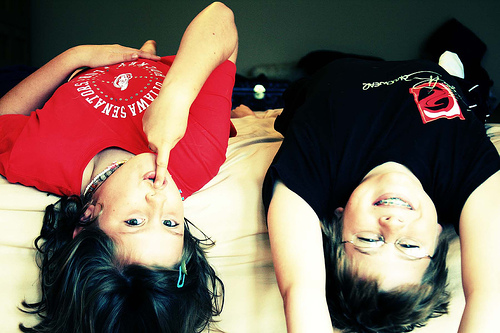

Two kids laying on a bed upside on


In [ ]:
z = image.load_img(img)
display(z)

print(Argmax_Search)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  display(image.load_img(fn))
  fn = get_encoding(resnet, fn)
  print(predict_captions(fn))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_images, bleu_score)
plt.xlabel('Images')
plt.ylabel('Bleu score')